__Hari Marasini__

_First Takehome Exam_

__Task 1__


_1. Importing necessary libraries,  our csv files and combing them into single DataFrame_


In [197]:
import pandas as pd
import numpy as np
import glob

In [198]:
df = []
for file in  sorted(glob.glob('exam1/*.csv')):
  print(file)
  temp_df = pd.read_csv(file)
  df.append(temp_df)

new_df= pd.concat(df, axis=0, ignore_index=True)
new_df

exam1/cow1.csv
exam1/cow2.csv
exam1/cow3.csv
exam1/cow4.csv
exam1/cow5.csv
exam1/cow6.csv


,cowID,TimeStamp_UNIX,TimeStamp_JST,AccX,AccY,AccZ,Label
0,cow1,1.591930e+12,22:57.0,0.010,0.025,-0.991,NaN
1,cow1,1.591930e+12,22:57.1,0.010,0.025,-0.991,NaN
2,cow1,1.591930e+12,22:57.1,0.010,0.024,-0.991,NaN
3,cow1,1.591930e+12,22:57.1,0.010,0.025,-0.991,NaN
4,cow1,1.591930e+12,22:57.2,0.010,0.025,-0.991,NaN
...,...,...,...,...,...,...,...
1391219,cow6,1.591950e+12,12:54.8,-0.178,0.637,0.754,NaN
1391220,cow6,1.591950e+12,12:54.8,-0.178,0.643,0.753,NaN
1391221,cow6,1.591950e+12,12:54.9,-0.175,0.642,0.754,NaN
1391222,cow6,1.591950e+12,12:54.9,-0.171,0.638,0.755,NaN


_2. Calculating basic statistics for each cow_



In [199]:
# Lets group cows by their 'cowID' and calculate basic statistics for acceleration on x-, y-, and z-axis
accn_stats = new_df.groupby('cowID')[['AccX', 'AccY', 'AccZ']].describe()
accn_stats

AccX                                                         \
          count      mean       std    min    25%    50%    75%    max   
cowID                                                                    
cow1   311876.0 -0.048461  0.356797 -2.324 -0.224 -0.002  0.140  2.785   
cow2   269772.0 -0.000170  0.158493 -2.367 -0.072 -0.026  0.020  2.265   
cow3   269903.0 -0.131902  0.230607 -2.823 -0.264 -0.081 -0.006  2.577   
cow4   224912.0 -0.015212  0.239346 -2.427 -0.094 -0.010  0.062  3.210   
cow5   134904.0 -0.104129  0.170700 -2.065 -0.193 -0.114 -0.055  2.396   
cow6   179857.0 -0.110762  0.216536 -1.956 -0.245 -0.153  0.014  1.805   

           AccY            ...                    AccZ                      \
          count      mean  ...    75%    max     count      mean       std   
cowID                      ...                                               
cow1   311876.0  0.473953  ...  0.792  3.779  311876.0  0.608336  0.384678   
cow2   269772.0  0.939090  ...  1.017  3.847  269772.0  0.338685  0.222159   
cow3   269903.0  0.913793  ...  1.054  3.960  269903.0  0.232667  0.291632   
cow4   224912.0  0.874750  ...  1.025  3.722  224912.0  0.288863  0.317407   
cow5   134904.0  0.422567  ...  0.588  3.376  134904.0  0.556068  0.710388   
cow6   179857.0  0.638789  ...  0.770  3.401  179857.0  0.671743  0.188473   

                                          
         min    25%    50%    75%    max  
cowID                                     
cow1  -1.732  0.298  0.806  0.890  2.827  
cow2  -1.130  0.176  0.239  0.542  3.562  
cow3  -2.336  0.052  0.118  0.407  3.704  
cow4  -2.274  0.143  0.191  0.532  2.973  
cow5  -1.844  0.701  0.810  0.888  3.924  
cow6  -1.481  0.611  0.684  0.746  3.690  

[6 rows x 24 columns]

_3. Calculating basic stats for each behavior class_

In [200]:
# Lets group cows by their 'Label' and calculate basic statistics for acceleration on x-, y-, and z-axis
behav_stats = new_df.groupby('Label')[['AccX', 'AccY', 'AccZ']].describe()
behav_stats

AccX                                                              \
          count      mean       std    min      25%     50%      75%    max   
Label                                                                         
ATT       366.0  0.077904  0.280506 -0.992 -0.10750  0.0395  0.26950  1.156   
BMN        54.0  0.206315  0.187727 -0.031  0.06025  0.1475  0.30425  0.600   
DRN      2476.0  0.274020  0.107220 -0.032  0.20600  0.2420  0.36800  0.848   
ESC       128.0  0.109641  0.198589 -0.361 -0.03400  0.1460  0.25925  0.522   
ETC    554855.0 -0.061700  0.240820 -2.823 -0.18900 -0.0700  0.03800  3.210   
FES      7934.0  0.253819  0.243448 -0.614  0.12600  0.2130  0.41400  1.112   
GRZ     17613.0  0.288700  0.175244 -0.239  0.16100  0.2810  0.41200  1.013   
LCK      1302.0  0.154773  0.280878 -0.627 -0.06875  0.1760  0.35775  0.887   
MOV     50199.0 -0.094320  0.189724 -2.431 -0.19200 -0.0920 -0.00200  1.900   
REL       764.0  0.003801  0.030270 -0.052 -0.02100  0.0030  0.01800  0.097   
RES    150130.0 -0.134534  0.146516 -1.323 -0.23100 -0.1010 -0.03600  1.847   
RUS     53229.0 -0.029309  0.050525 -0.451 -0.06000 -0.0320 -0.00900  0.520   
SLT     10858.0  0.021742  0.041311 -0.111  0.00400  0.0130  0.03100  0.472   
URI       621.0 -0.093043  0.044923 -0.211 -0.13500 -0.0970 -0.04600  0.000   

           AccY            ...                      AccZ                      \
          count      mean  ...      75%    max     count      mean       std   
Label                      ...                                                 
ATT       366.0  0.560530  ...  0.78275  1.727     366.0  0.803063  0.333369   
BMN        54.0  0.825889  ...  1.30175  2.556      54.0  0.654000  0.742287   
DRN      2476.0  0.739409  ...  1.02100  1.179    2476.0  0.451245  0.349025   
ESC       128.0  0.947961  ...  1.04700  1.406     128.0  0.245344  0.300389   
ETC    554855.0  0.786855  ...  1.00900  3.960  554855.0  0.489941  0.338110   
FES      7934.0  0.310959  ...  0.51600  1.868    7934.0  0.810819  0.139284   
GRZ     17613.0  0.731584  ...  0.92900  1.648   17613.0  0.515254  0.333756   
LCK      1302.0  0.737449  ...  1.01000  1.345    1302.0  0.392634  0.462868   
MOV     50199.0  0.787846  ...  0.99100  3.344   50199.0  0.539465  0.355899   
REL       764.0  0.760754  ...  0.83500  0.912     764.0  0.671590  0.090784   
RES    150130.0  0.731724  ...  0.99200  3.335  150130.0  0.545797  0.285168   
RUS     53229.0  1.008739  ...  1.03800  1.577   53229.0  0.176007  0.138091   
SLT     10858.0  1.031365  ...  1.08000  1.273   10858.0  0.106092  0.122264   
URI       621.0  0.718652  ...  1.04700  1.202     621.0  0.426254  0.411296   

                                              
         min      25%     50%     75%    max  
Label                                         
ATT   -0.323  0.63025  0.7785  0.9695  2.135  
BMN   -0.588  0.14700  0.5680  0.9650  2.282  
DRN    0.028  0.12000  0.1700  0.8020  1.077  
ESC   -0.103  0.03200  0.1255  0.5440  1.007  
ETC   -2.336  0.19500  0.5520  0.7430  3.924  
FES   -0.128  0.70300  0.8330  0.9370  1.594  
GRZ   -0.325  0.18000  0.6510  0.7860  1.337  
LCK   -0.445  0.06575  0.5335  0.8400  1.479  
MOV   -1.984  0.24200  0.5950  0.7820  3.486  
REL    0.514  0.59100  0.6735  0.7640  0.828  
RES   -0.518  0.25000  0.6000  0.8170  2.016  
RUS   -0.144  0.13300  0.1610  0.1860  0.906  
SLT   -0.087  0.05400  0.0900  0.1220  1.010  
URI   -0.009  0.07300  0.1560  0.9450  1.005  

[14 rows x 24 columns]

_4. Calculating basic stats for each behavior class (Label) and cow (cowID)_



In [201]:
label_cow_stats = new_df.groupby(['Label', 'cowID'])[['AccX', 'AccY', 'AccZ']].describe()
label_cow_stats

AccX                                                       \
                count      mean       std    min      25%     50%      75%   
Label cowID                                                                  
ATT   cow1       57.0 -0.037912  0.320097 -0.561 -0.23600 -0.1050  0.11700   
      cow2       50.0  0.164760  0.298740 -0.287 -0.03400  0.1540  0.28275   
      cow4       62.0 -0.000435  0.179071 -0.246 -0.12975 -0.0335  0.05875   
      cow6      197.0  0.114025  0.275470 -0.992 -0.09100  0.1280  0.30000   
BMN   cow2       54.0  0.206315  0.187727 -0.031  0.06025  0.1475  0.30425   
DRN   cow1     1176.0  0.345811  0.112629 -0.032  0.28900  0.3740  0.41000   
      cow3     1300.0  0.209077  0.039278  0.002  0.18975  0.2170  0.23600   
ESC   cow4      128.0  0.109641  0.198589 -0.361 -0.03400  0.1460  0.25925   
ETC   cow1   105917.0 -0.023781  0.271262 -2.324 -0.19900 -0.0420  0.11700   
      cow2   103084.0  0.012446  0.195929 -2.367 -0.07700 -0.0240  0.04300   
      cow3   129297.0 -0.151470  0.242088 -2.823 -0.36900 -0.1050 -0.01200   
      cow4    62064.0  0.026631  0.246299 -2.427 -0.10600 -0.0020  0.15100   
      cow5    53922.0 -0.096996  0.192270 -2.065 -0.19800 -0.1260 -0.02200   
      cow6   100571.0 -0.097808  0.214981 -1.956 -0.22400 -0.1310  0.01200   
FES   cow1     6809.0  0.310345  0.210297 -0.614  0.14100  0.2750  0.45900   
      cow5     1125.0 -0.088301  0.117994 -0.337 -0.15900 -0.1130 -0.04300   
GRZ   cow1     2416.0  0.459992  0.135982  0.058  0.36675  0.4610  0.54400   
      cow2     2199.0  0.447429  0.130231  0.036  0.35950  0.4480  0.52700   
      cow4     2707.0  0.309495  0.142487 -0.187  0.22300  0.3250  0.40700   
      cow5     2442.0  0.214732  0.151004 -0.239  0.11900  0.2180  0.31675   
      cow6     7849.0  0.207346  0.140794 -0.225  0.10700  0.2010  0.29500   
LCK   cow3      649.0  0.226573  0.254509 -0.221 -0.00500  0.2020  0.40100   
      cow4      297.0  0.213377  0.231932 -0.627  0.04800  0.2890  0.37600   
      cow6      356.0 -0.025014  0.285171 -0.512 -0.23125 -0.1260  0.25975   
MOV   cow1     6376.0 -0.180047  0.219072 -2.120 -0.30100 -0.1930 -0.06600   
      cow2     8437.0 -0.017834  0.137815 -1.141 -0.08500 -0.0200  0.04100   
      cow3     7532.0 -0.061976  0.188673 -2.431 -0.13600 -0.0520  0.01700   
      cow4    17248.0 -0.064367  0.181340 -1.553 -0.15400 -0.0810  0.00200   
      cow5     4846.0 -0.100613  0.134848 -1.644 -0.17500 -0.1060 -0.03800   
      cow6     5760.0 -0.238151  0.176030 -1.333 -0.31200 -0.2360 -0.17000   
REL   cow2      360.0  0.010078  0.014225 -0.035  0.00175  0.0120  0.01800   
      cow4      404.0 -0.001792  0.038574 -0.052 -0.02900 -0.0190  0.01925   
RES   cow1    35814.0 -0.169981  0.159422 -0.553 -0.29200 -0.2220 -0.02600   
      cow2    47059.0 -0.039769  0.069109 -1.323 -0.08100 -0.0470 -0.01400   
      cow3    20501.0 -0.166912  0.179288 -0.522 -0.20700 -0.0980 -0.04700   
      cow4    15735.0 -0.142973  0.069438 -0.343 -0.20600 -0.1370 -0.10500   
      cow5    11025.0 -0.116516  0.103837 -0.608 -0.17400 -0.1390 -0.10100   
      cow6    19996.0 -0.264162  0.142211 -0.545 -0.37200 -0.2950 -0.20600   
RUS   cow1     1620.0  0.054195  0.037542  0.001  0.03000  0.0420  0.06500   
      cow2    25930.0 -0.035839  0.030494 -0.395 -0.05600 -0.0320 -0.01600   
      cow3    11156.0 -0.052474  0.038515 -0.224 -0.07800 -0.0480 -0.02600   
      cow4    14523.0 -0.009169  0.068760 -0.451 -0.05500 -0.0230  0.02500   
SLT   cow1      204.0  0.246515  0.086577  0.005  0.19000  0.2420  0.30075   
      cow3    10654.0  0.017438  0.024708 -0.111  0.00300  0.0130  0.02900   
URI   cow1      238.0 -0.134298  0.015641 -0.181 -0.13875 -0.1360 -0.13300   
      cow3      383.0 -0.067407  0.037474 -0.211 -0.09500 -0.0650 -0.03500   

                        AccY            ...                      AccZ  \
               max     count      mean  ...      75%    max     count   
Label cowID                             ...     

_5. Coverting 'TimeStamp_UNIX' into datetime format and creating a new column 'Hour'_

In [202]:
import datetime as dt

_6. Calculating basic stats for each 'hour'_




In [203]:
new_df['TimeStamp_UNIX'] = pd.to_datetime(new_df['TimeStamp_UNIX'], unit='ms')
new_df['Hour'] = new_df['TimeStamp_UNIX'].dt.strftime('%Y-%m-%d %H:%M:%S').str.split(' ').str[1]
new_df

,cowID,TimeStamp_UNIX,TimeStamp_JST,AccX,AccY,AccZ,Label,Hour
0,cow1,2020-06-12 02:46:40,22:57.0,0.010,0.025,-0.991,NaN,02:46:40
1,cow1,2020-06-12 02:46:40,22:57.1,0.010,0.025,-0.991,NaN,02:46:40
2,cow1,2020-06-12 02:46:40,22:57.1,0.010,0.024,-0.991,NaN,02:46:40
3,cow1,2020-06-12 02:46:40,22:57.1,0.010,0.025,-0.991,NaN,02:46:40
4,cow1,2020-06-12 02:46:40,22:57.2,0.010,0.025,-0.991,NaN,02:46:40
...,...,...,...,...,...,...,...,...
1391219,cow6,2020-06-12 08:20:00,12:54.8,-0.178,0.637,0.754,NaN,08:20:00
1391220,cow6,2020-06-12 08:20:00,12:54.8,-0.178,0.643,0.753,NaN,08:20:00
1391221,cow6,2020-06-12 08:20:00,12:54.9,-0.175,0.642,0.754,NaN,08:20:00
1391222,cow6,2020-06-12 08:20:00,12:54.9,-0.171,0.638,0.755,NaN,08:20:00


In [204]:
hour_stats = new_df.groupby('Hour')[['AccX', 'AccY', 'AccZ']].describe()
hour_stats

AccX                                                         \
             count      mean       std    min    25%    50%    75%    max   
Hour                                                                        
02:46:40  722122.0 -0.112168  0.302588 -2.823 -0.257 -0.103  0.027  3.210   
05:33:20  115940.0 -0.016806  0.212582 -2.290 -0.120 -0.044  0.025  1.930   
08:20:00  553162.0 -0.009406  0.163055 -2.133 -0.085 -0.021  0.041  2.325   

              AccY            ...                    AccZ                      \
             count      mean  ...    75%    max     count      mean       std   
Hour                          ...                                               
02:46:40  722122.0  0.614744  ...  0.888  3.960  722122.0  0.503862  0.441630   
05:33:20  115940.0  0.935564  ...  1.031  3.601  115940.0  0.282056  0.283761   
08:20:00  553162.0  0.838885  ...  1.031  3.335  553162.0  0.376276  0.332379   

                                             
            min    25%    50%    75%    max  
Hour                                         
02:46:40 -2.336  0.253  0.612  0.790  3.924  
05:33:20 -1.464  0.141  0.202  0.302  3.533  
08:20:00 -1.732  0.135  0.205  0.721  2.621  

[3 rows x 24 columns]

_7. Dropping 'TimeStamp_JST' column from our new dataframe_




In [205]:
new_df = new_df.drop('TimeStamp_JST', axis=1)
new_df

,cowID,TimeStamp_UNIX,AccX,AccY,AccZ,Label,Hour
0,cow1,2020-06-12 02:46:40,0.010,0.025,-0.991,NaN,02:46:40
1,cow1,2020-06-12 02:46:40,0.010,0.025,-0.991,NaN,02:46:40
2,cow1,2020-06-12 02:46:40,0.010,0.024,-0.991,NaN,02:46:40
3,cow1,2020-06-12 02:46:40,0.010,0.025,-0.991,NaN,02:46:40
4,cow1,2020-06-12 02:46:40,0.010,0.025,-0.991,NaN,02:46:40
...,...,...,...,...,...,...,...
1391219,cow6,2020-06-12 08:20:00,-0.178,0.637,0.754,NaN,08:20:00
1391220,cow6,2020-06-12 08:20:00,-0.178,0.643,0.753,NaN,08:20:00
1391221,cow6,2020-06-12 08:20:00,-0.175,0.642,0.754,NaN,08:20:00
1391222,cow6,2020-06-12 08:20:00,-0.171,0.638,0.755,NaN,08:20:00


_8. Adding 'TotalActivity' as a new column with absolute values of AccX, AccY & AccZ_

In [206]:
new_df['TotalActivity'] = new_df[['AccX', 'AccY', 'AccZ']].abs().sum(axis=1)
new_df.head()


,cowID,TimeStamp_UNIX,AccX,AccY,AccZ,Label,Hour,TotalActivity
0,cow1,2020-06-12 02:46:40,0.01,0.025,-0.991,NaN,02:46:40,1.026
1,cow1,2020-06-12 02:46:40,0.01,0.025,-0.991,NaN,02:46:40,1.026
2,cow1,2020-06-12 02:46:40,0.01,0.024,-0.991,NaN,02:46:40,1.025
3,cow1,2020-06-12 02:46:40,0.01,0.025,-0.991,NaN,02:46:40,1.026
4,cow1,2020-06-12 02:46:40,0.01,0.025,-0.991,NaN,02:46:40,1.026


_9. Adding 'ActivityStatus' as a new column and assigning 'Active' and 'Inactive' variables based on absolute values of AccX, AccY & AccZ all greater/equal or less than 0.1 respectively._

In [207]:
new_df['ActivityStatus'] = np.where(
    (new_df['AccX'].abs() >= 0.1) &
    (new_df['AccY'].abs() >= 0.1) &
    (new_df['AccZ'].abs() >= 0.1),
    'Active',
    'Inactive'
)

new_df.head()

,cowID,TimeStamp_UNIX,AccX,AccY,AccZ,Label,Hour,TotalActivity,ActivityStatus
0,cow1,2020-06-12 02:46:40,0.01,0.025,-0.991,NaN,02:46:40,1.026,Inactive
1,cow1,2020-06-12 02:46:40,0.01,0.025,-0.991,NaN,02:46:40,1.026,Inactive
2,cow1,2020-06-12 02:46:40,0.01,0.024,-0.991,NaN,02:46:40,1.025,Inactive
3,cow1,2020-06-12 02:46:40,0.01,0.025,-0.991,NaN,02:46:40,1.026,Inactive
4,cow1,2020-06-12 02:46:40,0.01,0.025,-0.991,NaN,02:46:40,1.026,Inactive


_10. Exporting our results from step 2 to 4 and step 6 to multiple worksheets within a single Excel file_

In [208]:
!pip install xlsxwriter

file_path = 'result2to6.xlsx'

with pd.ExcelWriter(file_path, engine='xlsxwriter') as writer:

    # Writing 'accn_stats', 'behav_stats' & 'label_cow_stats' to the first, second and third woeksheets
    accn_stats.to_excel(writer, sheet_name='accn_stats', index=True, header=True)
    behav_stats.to_excel(writer, sheet_name='behav_stats', index=True, header=True)
    label_cow_stats.to_excel(writer, sheet_name='label_cow_stats', index=True, header=True)


_11. Exporting results from step 9 into CSV_

In [209]:
activity_stats = 'results_step9.csv'

new_df.to_csv(activity_stats, index=False)

__.........................................................................................................................................................................................................................................................................................__

__Task_2__

_1. Dropping all possible null/empty/invalid values_

In [210]:
import pandas as pd

df_pngn = pd.read_csv('penguins.csv', na_values=[' ', 'NA', 'NaN', 'Null']).dropna()
df_pngn

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,gender
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,MALE
...,...,...,...,...,...,...,...
338,Gentoo,Biscoe,47.2,13.7,214.0,4925.0,FEMALE
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,FEMALE
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,MALE
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,FEMALE


_Importing seaborn and matplotlib library and Creating a empty list to store all figures separately_

In [213]:
import seaborn as sns
import matplotlib.pyplot as plt

figures = []

_2. Creating a scatterplot with information of flipper length, body mass, gender, species, and island._

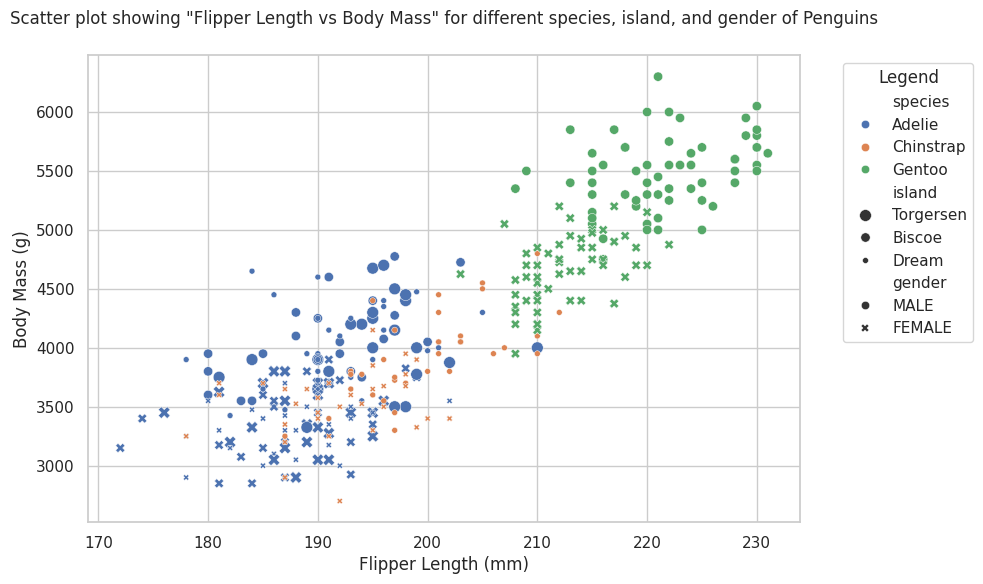

In [214]:
sns.set(style="whitegrid")
fig1, ax1 = plt.subplots(figsize=(10, 6))
scatter_plot = sns.scatterplot(x='flipper_length_mm', y='body_mass_g', hue='species', style='gender', size='island', data=df_pngn, ax=ax1)
ax1.set_xlabel('Flipper Length (mm)')
ax1.set_ylabel('Body Mass (g)')
ax1.set_title('Scatter plot showing "Flipper Length vs Body Mass" for different species, island, and gender of Penguins', y=1.05)
ax1.legend(title='Legend', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

figures.append(fig1)

_3. Creating line plots with 95% confidence intervals including the information of bill depth, body mass, gender, species, and island_

/usr/local/lib/python3.10/dist-packages/seaborn/relational.py:728: UserWarning: relplot is a figure-level function and does not accept the `ax` parameter. You may wish to try lineplot
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:854: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 95)` for the same effect.

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:854: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 95)` for the same effect.

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:854: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 95)` for the same effect.

  func(*plot_args, **plot_kwargs)


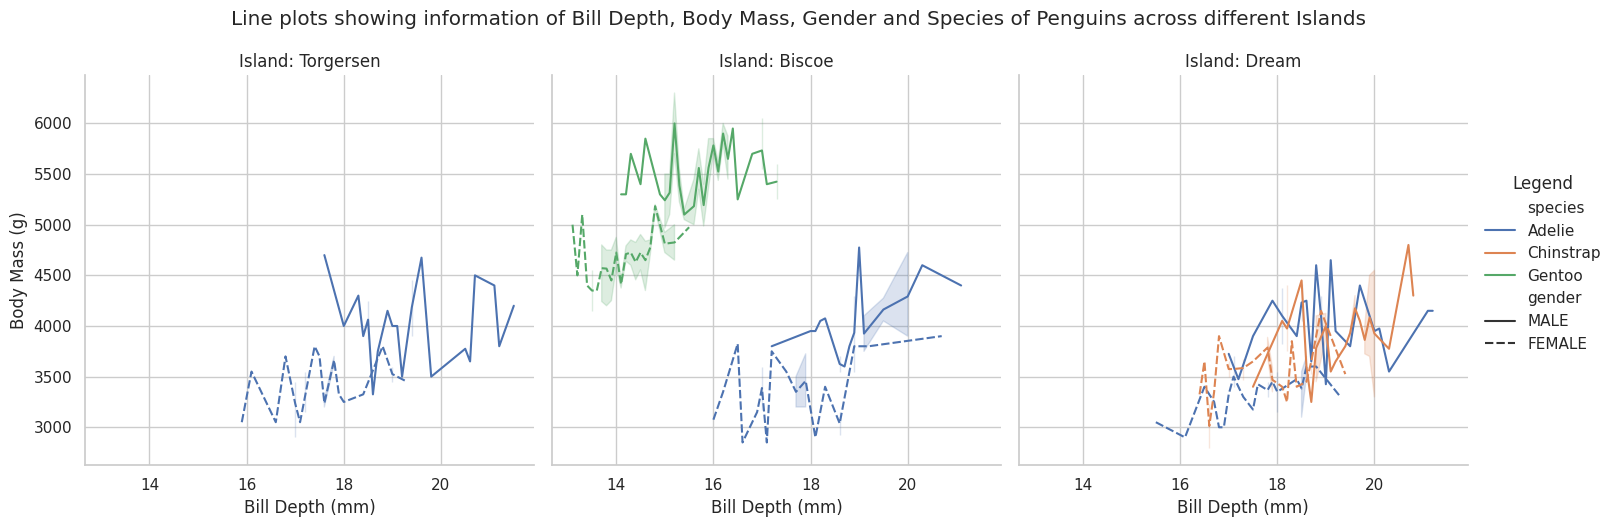

In [215]:
sns.set(style="whitegrid")

rel_plot = sns.relplot(
    data=df_pngn,
    x="bill_depth_mm",
    y="body_mass_g",
    kind='line',
    hue="species",
    style='gender',
    col="island",
    ci=95,
    ax=ax  # Use the existing axes object
)

rel_plot.set_axis_labels("Bill Depth (mm)", "Body Mass (g)")
rel_plot.set_titles(col_template="Island: {col_name}")
rel_plot._legend.set_title("Legend")
plt.suptitle("Line plots showing information of Bill Depth, Body Mass, Gender and Species of Penguins across different Islands", y=1.05)

figures.append(plt.gcf())



_4. Creating linear regression plots including the information of bill length, body mass, gender, species, and island_

<Figure size 1000x600 with 0 Axes>

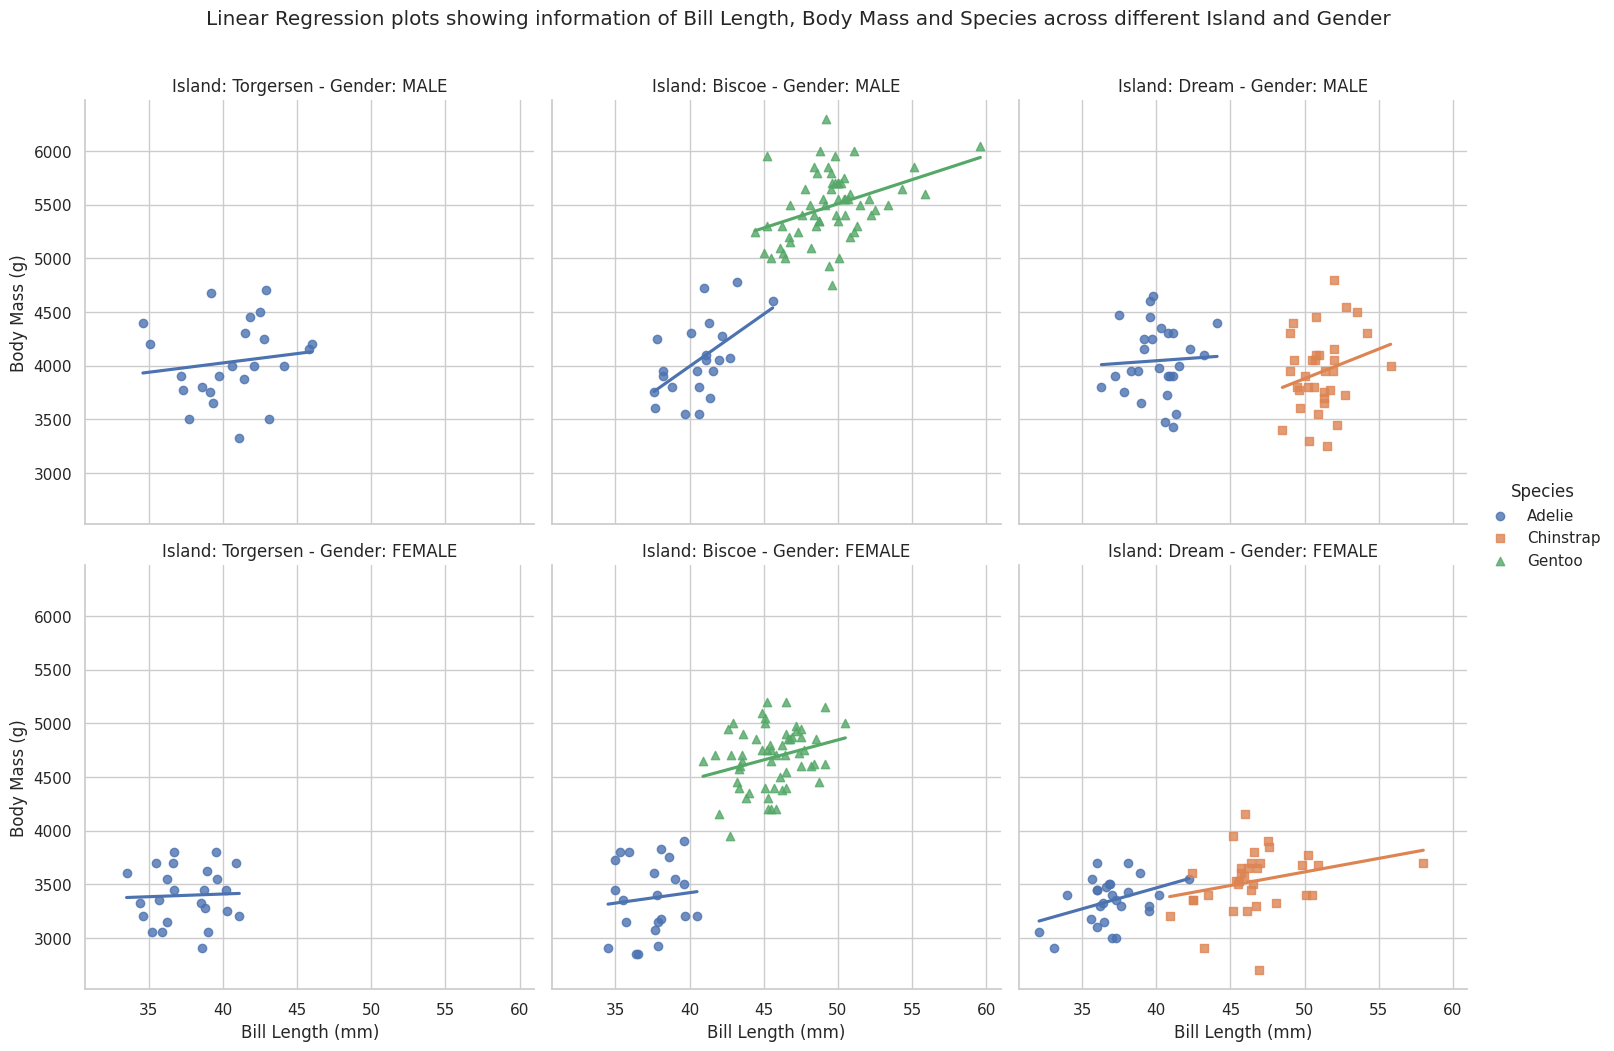

In [216]:
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
lm_plot = sns.lmplot(data=df_pngn, x="bill_length_mm", y="body_mass_g", hue="species", col="island", row="gender", markers=["o", "s", "^"], ci=None, hue_order=['Adelie', 'Chinstrap', 'Gentoo'])
lm_plot.set_axis_labels("Bill Length (mm)", "Body Mass (g)")
lm_plot.set_titles("Island: {col_name} - Gender: {row_name}")
lm_plot._legend.set_title("Species")
plt.suptitle("Linear Regression plots showing information of Bill Length, Body Mass and Species across different Island and Gender", y=1.05)

figures.append(plt.gcf())

<Figure size 1000x600 with 0 Axes>

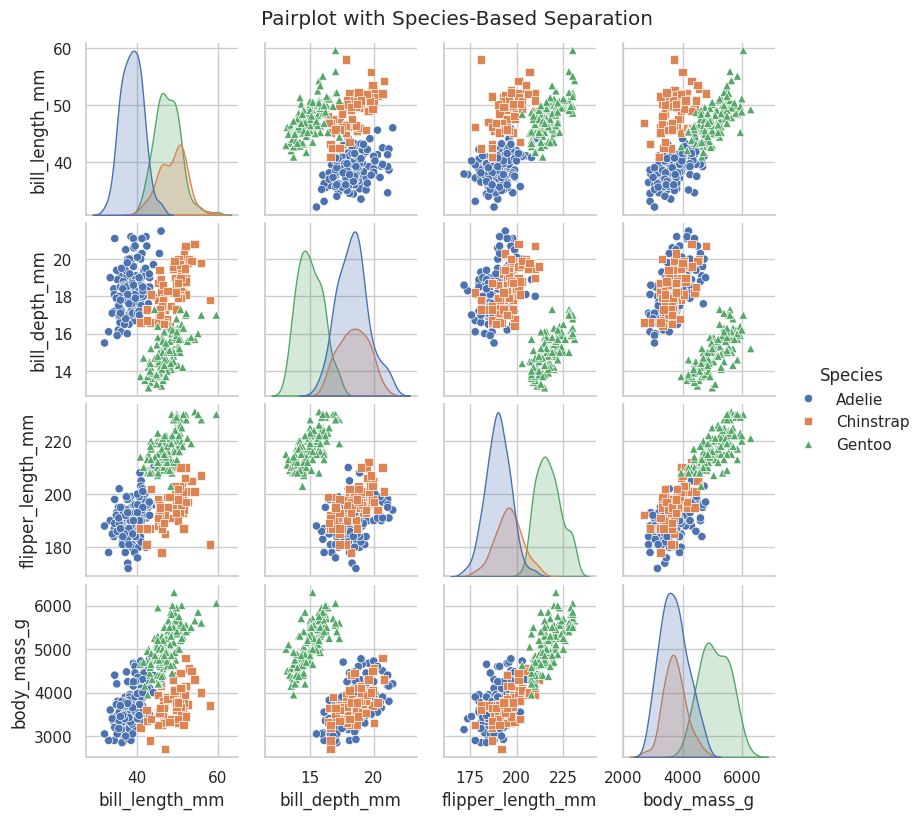

In [217]:
sns.set(style="whitegrid")

plt.figure(figsize=(10, 6))
pair_plot = sns.pairplot(df_pngn, hue="species", markers=["o", "s", "^"], diag_kind='kde', height=2)
plt.suptitle("Pairplot with Species-Based Separation", y=1.02)
pair_plot._legend.set_title("Species")

figures.append(plt.gcf())


_6. We have now all the figures from step 2 to step 5 in "figures" list. Now, we will be using 'for' loop and iterating through all images in that list and export them as 'png' at 300 dpi._

In [218]:
for i, fig in enumerate(figures):
    fig.savefig(f'figure_{i + 1}.png', dpi=300, bbox_inches='tight')